<a href="https://colab.research.google.com/github/martuscellifaria/FluidsAcousticsHeat/blob/master/2D%20Cartesian%20Heat%20Diffusion%20Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2D Heat Diffusion**
One more step of heat equation solving. Let's jump right in a 2D Unsteady heat diffusion problem. We'll start from a rectangular flat surface of 304A Stainless Steel bar with dimensions Lx = 2 m, Ly = 2 m  initially at 20 C. We'll add a rapidly heat up in the region delimited by Lx/4 < x < Lx/2 and Ly/4 < y < Ly/2 to 80 C and cease the source immediately. The default solution is performed for one hour, but you can change it to whatever time you want. You'll notice a slight increase in computational time as it is increased.

## **1 Import libraries**
Yeah, I know you already got it.

In [167]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline

## **2 Set your variables and calculate time and space divisions**

In [168]:
Lx = 2
Ly = 2
nx = 101
ny = 101
t = 1*60*60
nu = 4.2*(10**-6)
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu
nt = round(t/dt)
T_0 = 20
T_i = 80
nt

151

## **3 Initialize your problem**
Ya know, initial and/or boundary conditions

In [169]:
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

T = T_0*np.ones((ny, nx))  # Initialize temperature vector
Tn = T_0*np.ones((ny, nx)) # Create a copy of that vector

###Assign initial conditions
T[int((Ly/4) / dy):int((Ly/2) / dy + 1),int((Lx/4) / dx):int((Lx/2) / dx + 1)] = T_i

## **4 Plot your the problem initial configuration**

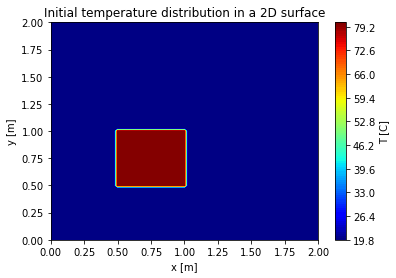

In [170]:
fig = plt.figure()
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, T, 100, cmap='jet')
plt.title("Initial temperature distribution in a 2D surface")
plt.colorbar(label='T [C]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
#plt.grid(which='major')
#plt.grid(which='minor')
plt.show()

## **5 Discretize the 2D Heat Equation**

In [171]:
def diffuse(nt):
    T[int((Ly/4) / dy):int((Ly/2) / dy + 1),int((Lx/4) / dx):int((Lx/2) / dx + 1)] = T_i  
    
    for n in range(nt + 1): 
        Tn = T.copy()
        T[1:-1, 1:-1] = (Tn[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (Tn[1:-1, 2:] - 2 * Tn[1:-1, 1:-1] + Tn[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (Tn[2:,1: -1] - 2 * Tn[1:-1, 1:-1] + Tn[0:-2, 1:-1]))
        T[0, :] = T_0
        T[-1, :] = T_0
        T[:, 0] = T_0
        T[:, -1] = T_0
    return T

## **6 Run it for any time step you want to!**
Here, we're showing the last one, but you can choose any value from zero to the nt value displayed in section 2.

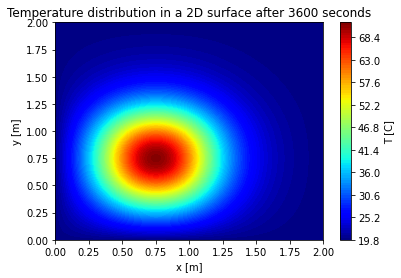

In [176]:
plt.contourf(X, Y, diffuse(nt), 100, cmap='jet')
plt.title("Temperature distribution in a 2D surface after %d seconds" %t)
plt.colorbar(label='T [C]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()